## Carga de librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas_datareader.data as web

## Descarga de datos

In [2]:
treasury = ['DGS1MO', 'DGS3MO', 'DGS6MO', 'DGS1', 'DGS2', 'DGS3',
            'DGS5', 'DGS7', 'DGS10', 'DGS20', 'DGS30']
df = web.DataReader(treasury, 'fred', start='1/1/1960')
df.columns = ['TRESY1mo', 'TRESY3mo', 'TRESY6mo', 'TRESY1y', 
                'TRESY2y', 'TRESY3y', 'TRESY5y', 'TRESY7y', 
                'TRESY10y', 'TRESY20y', 'TRESY30y']

## Análisis exploratorio de datos

In [3]:
df.shape

(16333, 11)

In [4]:
df.tail()

,TRESY1mo,TRESY3mo,TRESY6mo,TRESY1y,TRESY2y,TRESY3y,TRESY5y,TRESY7y,TRESY10y,TRESY20y,TRESY30y
DATE,,,,,,,,,,,
2024-08-02,5.54,5.29,4.88,4.33,3.88,3.70,3.62,3.68,3.80,4.19,4.11
2024-08-05,5.52,5.35,4.91,4.34,3.89,3.71,3.62,3.66,3.78,4.16,4.06
2024-08-06,5.50,5.34,5.00,4.46,3.99,3.76,3.73,3.79,3.90,4.28,4.18
2024-08-07,5.50,5.34,4.99,4.45,4.00,3.81,3.79,3.85,3.96,4.35,4.26
2024-08-08,5.55,5.34,5.01,4.48,4.04,3.86,3.83,3.89,3.99,4.38,4.28


In [5]:
df.dtypes

TRESY1mo    float64
TRESY3mo    float64
TRESY6mo    float64
TRESY1y     float64
TRESY2y     float64
TRESY3y     float64
TRESY5y     float64
TRESY7y     float64
TRESY10y    float64
TRESY20y    float64
TRESY30y    float64
dtype: object

In [6]:
df.describe()

,TRESY1mo,TRESY3mo,TRESY6mo,TRESY1y,TRESY2y,TRESY3y,TRESY5y,TRESY7y,TRESY10y,TRESY20y,TRESY30y
count,5759.000000,10735.00000,10735.000000,15637.000000,12045.000000,15637.000000,15637.000000,13767.000000,15637.000000,13948.000000,11867.000000
mean,1.495306,3.81194,3.988444,4.903610,4.998793,5.283341,5.530962,5.863950,5.855443,5.886667,6.216273
std,1.749615,3.18244,3.287339,3.396423,3.723752,3.285319,3.160248,3.225018,2.963895,2.870602,3.021240
min,0.000000,0.00000,0.020000,0.040000,0.090000,0.100000,0.190000,0.360000,0.520000,0.870000,0.990000
25%,0.070000,0.83000,0.980000,2.230000,1.620000,2.760000,3.200000,3.155000,3.860000,4.030000,3.810000
50%,0.900000,3.82000,4.010000,4.980000,4.770000,5.160000,5.380000,5.970000,5.580000,5.340000,5.600000
75%,2.240000,5.67500,5.865000,6.760000,7.220000,7.240000,7.450000,7.830000,7.600000,7.330000,8.160000
max,6.020000,17.01000,17.430000,17.310000,16.950000,16.590000,16.270000,16.050000,15.840000,15.780000,15.210000


## Visualización de datos

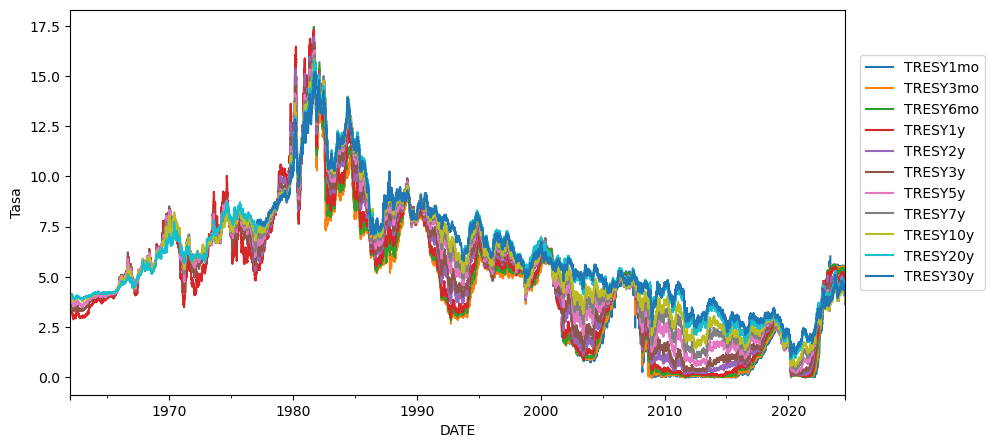

In [7]:
# Histórico de datos
df.plot(figsize=(10, 5))
plt.ylabel('Tasa')
plt.legend(bbox_to_anchor=(1.01, 0.9), loc=2)
plt.show()

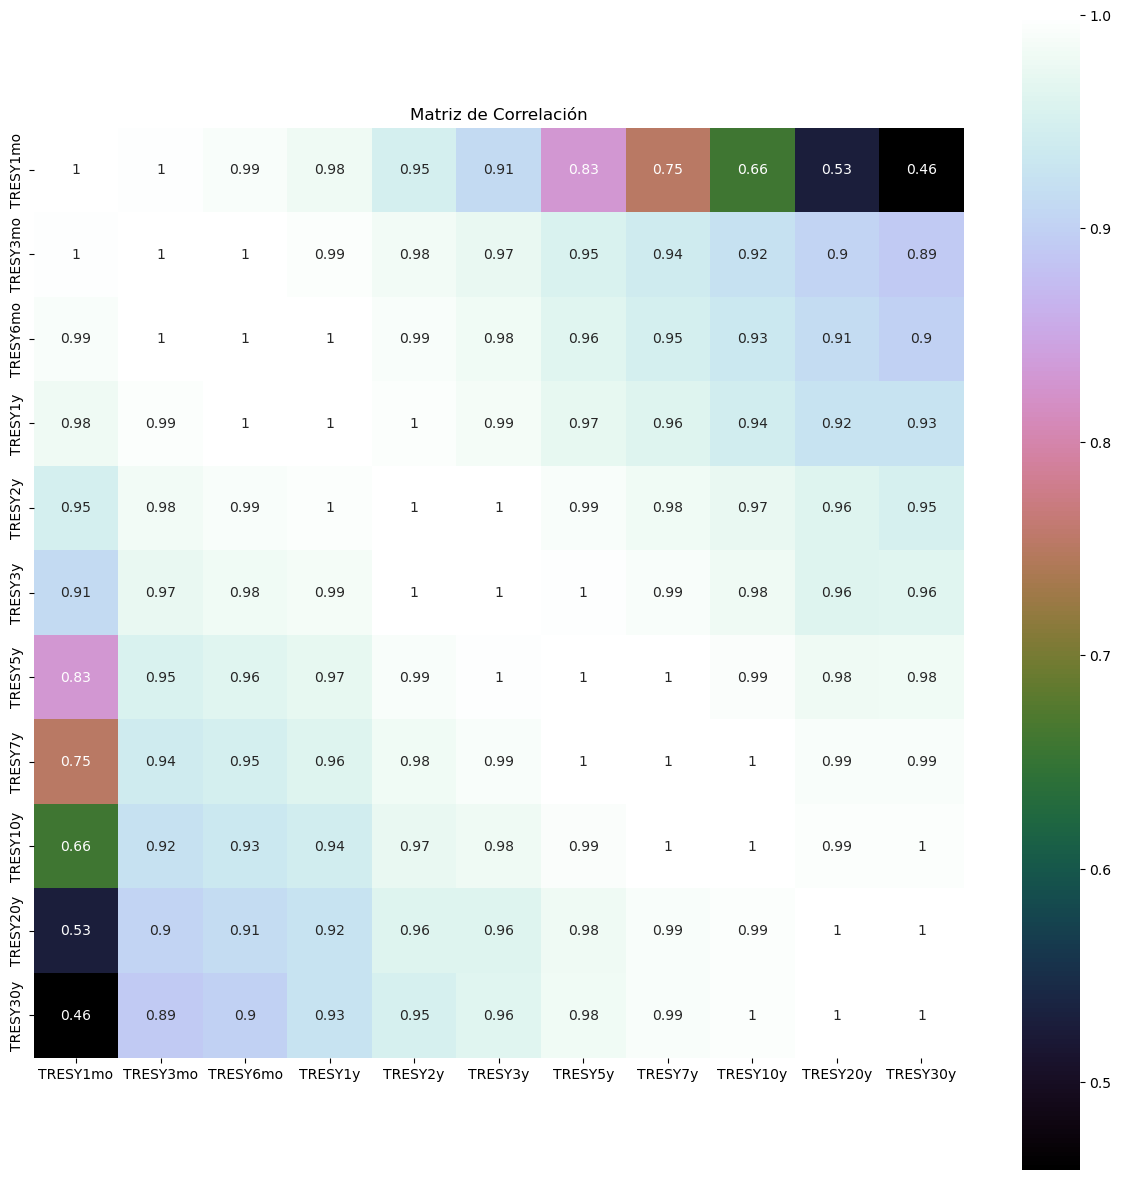

In [8]:
# Correlación de datos
plt.figure(figsize=(15, 15))
plt.title('Matriz de Correlación')
sns.heatmap(df.corr(), vmax=1, square=True, annot=True, cmap='cubehelix')
plt.show()

## Limpieza de datos

In [9]:
# Rellenar valores nulos con el último valor disponible
if df.isnull().values.any():
    df = df.ffill()
    df = df.dropna(axis=0)
df

,TRESY1mo,TRESY3mo,TRESY6mo,TRESY1y,TRESY2y,TRESY3y,TRESY5y,TRESY7y,TRESY10y,TRESY20y,TRESY30y
DATE,,,,,,,,,,,
2001-07-31,3.67,3.54,3.47,3.53,3.79,4.06,4.57,4.86,5.07,5.61,5.51
2001-08-01,3.65,3.53,3.47,3.56,3.83,4.09,4.62,4.90,5.11,5.63,5.53
2001-08-02,3.65,3.53,3.46,3.57,3.89,4.17,4.69,4.97,5.17,5.68,5.57
2001-08-03,3.63,3.52,3.47,3.57,3.91,4.22,4.72,4.99,5.20,5.70,5.59
2001-08-06,3.62,3.52,3.47,3.56,3.88,4.17,4.71,4.99,5.19,5.70,5.59
...,...,...,...,...,...,...,...,...,...,...,...
2024-08-02,5.54,5.29,4.88,4.33,3.88,3.70,3.62,3.68,3.80,4.19,4.11
2024-08-05,5.52,5.35,4.91,4.34,3.89,3.71,3.62,3.66,3.78,4.16,4.06
2024-08-06,5.50,5.34,5.00,4.46,3.99,3.76,3.73,3.79,3.90,4.28,4.18


## Transformación de datos

In [10]:
# Estandarización de datos
scaler = StandardScaler().fit(df)
rescaled_df = pd.DataFrame(scaler.transform(df), columns=df.columns, index=df.index)
rescaled_df.head()

,TRESY1mo,TRESY3mo,TRESY6mo,TRESY1y,TRESY2y,TRESY3y,TRESY5y,TRESY7y,TRESY10y,TRESY20y,TRESY30y
DATE,,,,,,,,,,,
2001-07-31,1.243723,1.115451,1.011871,1.037998,1.185815,1.327351,1.569250,1.657268,1.676098,1.644027,1.608332
2001-08-01,1.232284,1.109807,1.011871,1.055550,1.211416,1.347924,1.607281,1.689822,1.710177,1.660649,1.626437
2001-08-02,1.232284,1.109807,1.006250,1.061401,1.249816,1.402785,1.660524,1.746791,1.761297,1.702202,1.662646
2001-08-03,1.220844,1.104164,1.011871,1.061401,1.262617,1.437073,1.683342,1.763068,1.786856,1.718823,1.680751
2001-08-06,1.215125,1.104164,1.011871,1.055550,1.243416,1.402785,1.675736,1.763068,1.778337,1.718823,1.680751


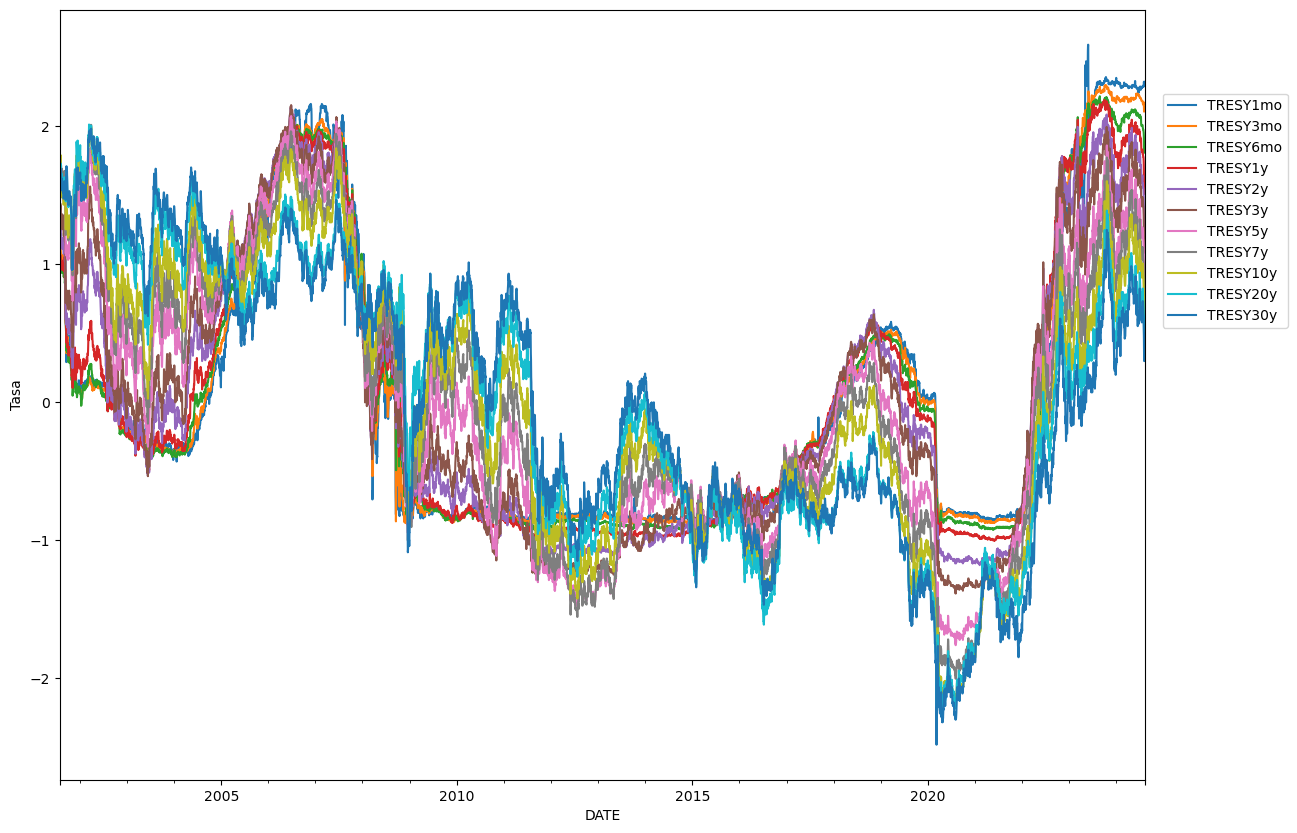

In [11]:
# Visualizando los datos reescalados
rescaled_df.plot(figsize=(14, 10))
plt.ylabel('Tasa')
plt.legend(bbox_to_anchor=(1.01, 0.9), loc=2)
plt.show()

## Aplicando el modelo

In [12]:
# Análisis de componentes principales
pca = PCA()
pca.fit(rescaled_df)

PCA()

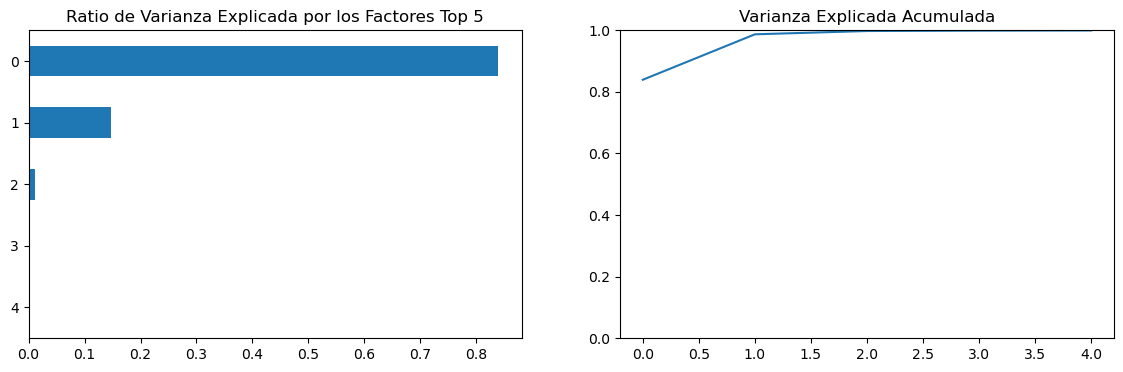

In [13]:
# Varianza explicada usando PCA
num_eigen_values = 5
pd.Series(np.cumsum(pca.explained_variance_ratio_)).to_frame('Varianza_Explicada_Top_5')
fig, axes = plt.subplots(ncols=2, figsize=(14, 4))
pd.Series(pca.explained_variance_ratio_[:num_eigen_values]).sort_values().plot.barh(title='Ratio de Varianza Explicada por los Factores Top 5', ax=axes[0])
pd.Series(pca.explained_variance_ratio_[:num_eigen_values]).cumsum().plot(ylim=(0, 1), ax=axes[1], title='Varianza Explicada Acumulada')
plt.show()

In [15]:
# Determinar el peso de cada componente principal
def pcs_weigths():
    weights = np.empty_like(pca.components_)
    # Normalizar los pesos
    for i in range(len(pca.components_)):
        component_sum = np.sum(pca.components_[i])
        if component_sum != 0:
            weights[i] = pca.components_[i] / component_sum
        else:
            weights[i] = pca.components_[i]
    return weights

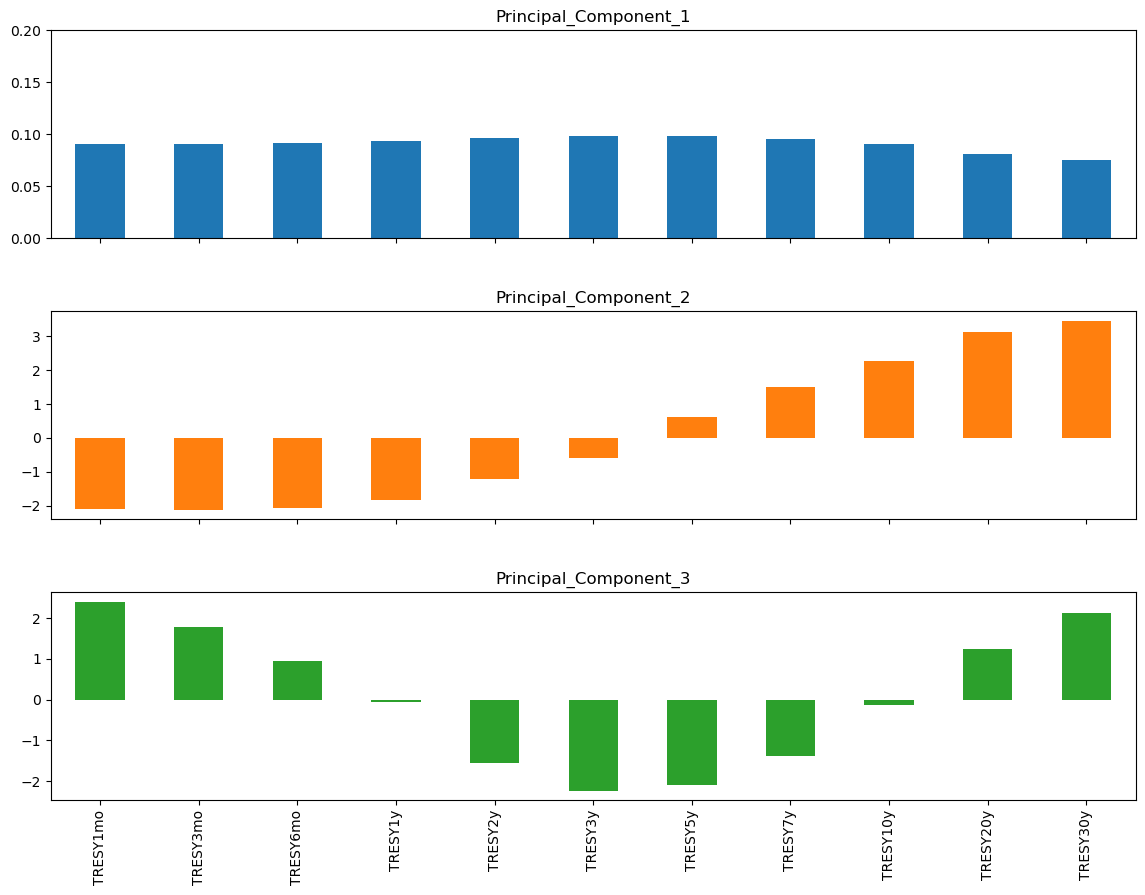

In [19]:
# Encontrar los Top portfolios
weights = pcs_weigths()
num_components = 3
top_portfolios = pd.DataFrame(weights[:num_components], columns=df.columns)
top_portfolios.index = [f"Principal_Component_{i}" for i in range(1, num_components+1)]
# Visualizando
axes = top_portfolios.T.plot.bar(subplots=True, legend=False, figsize=(14, 10))
plt.subplots_adjust(hspace=0.35)
axes[0].set_ylim(0, .2)
plt.show()

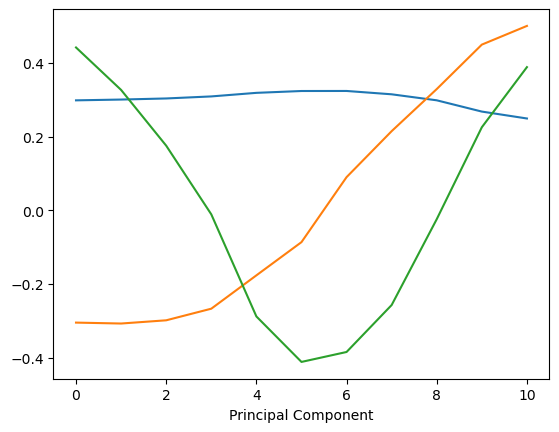

In [21]:
# Visualizando
plt.plot(pca.components_[0:3].T)
plt.xlabel("Principal Component")
plt.show()

## Reconstruyendo la curva a partir de los Componentes Principales

In [22]:
pca.transform(rescaled_df)[:, :2]

array([[ 4.51262118,  0.96932862],
       [ 4.569447  ,  1.00173208],
       [ 4.67012232,  1.06098913],
       ...,
       [ 4.15894936, -1.7388641 ],
       [ 4.24760221, -1.64592477],
       [ 4.3231404 , -1.63172601]])

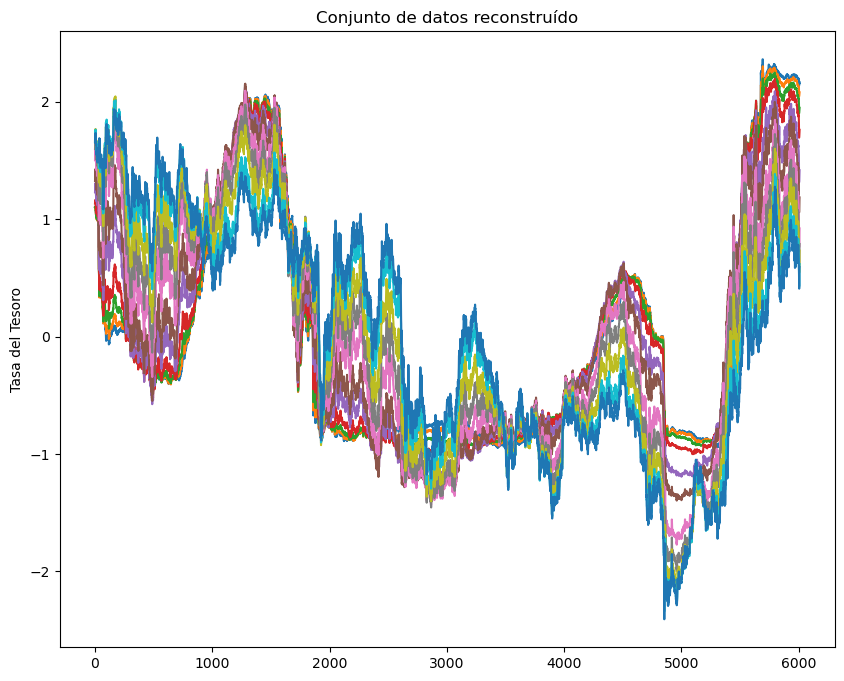

In [28]:
reconstr_df = pd.DataFrame(np.dot(pca.transform(rescaled_df)[:, :num_components], pca.components_[:num_components, :]), columns=df.columns)
plt.figure(figsize=(10, 8))
plt.plot(reconstr_df)
plt.ylabel('Tasa del Tesoro')
plt.title('Conjunto de datos reconstruído')
plt.show()